## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
# Columns where 0 means missing
cols_with_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Replace 0 with np.nan in those columns
diabetes_data[cols_with_missing] = diabetes_data[cols_with_missing].replace(0, np.nan)

# Check that NaNs are appearing
diabetes_data[cols_with_missing].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

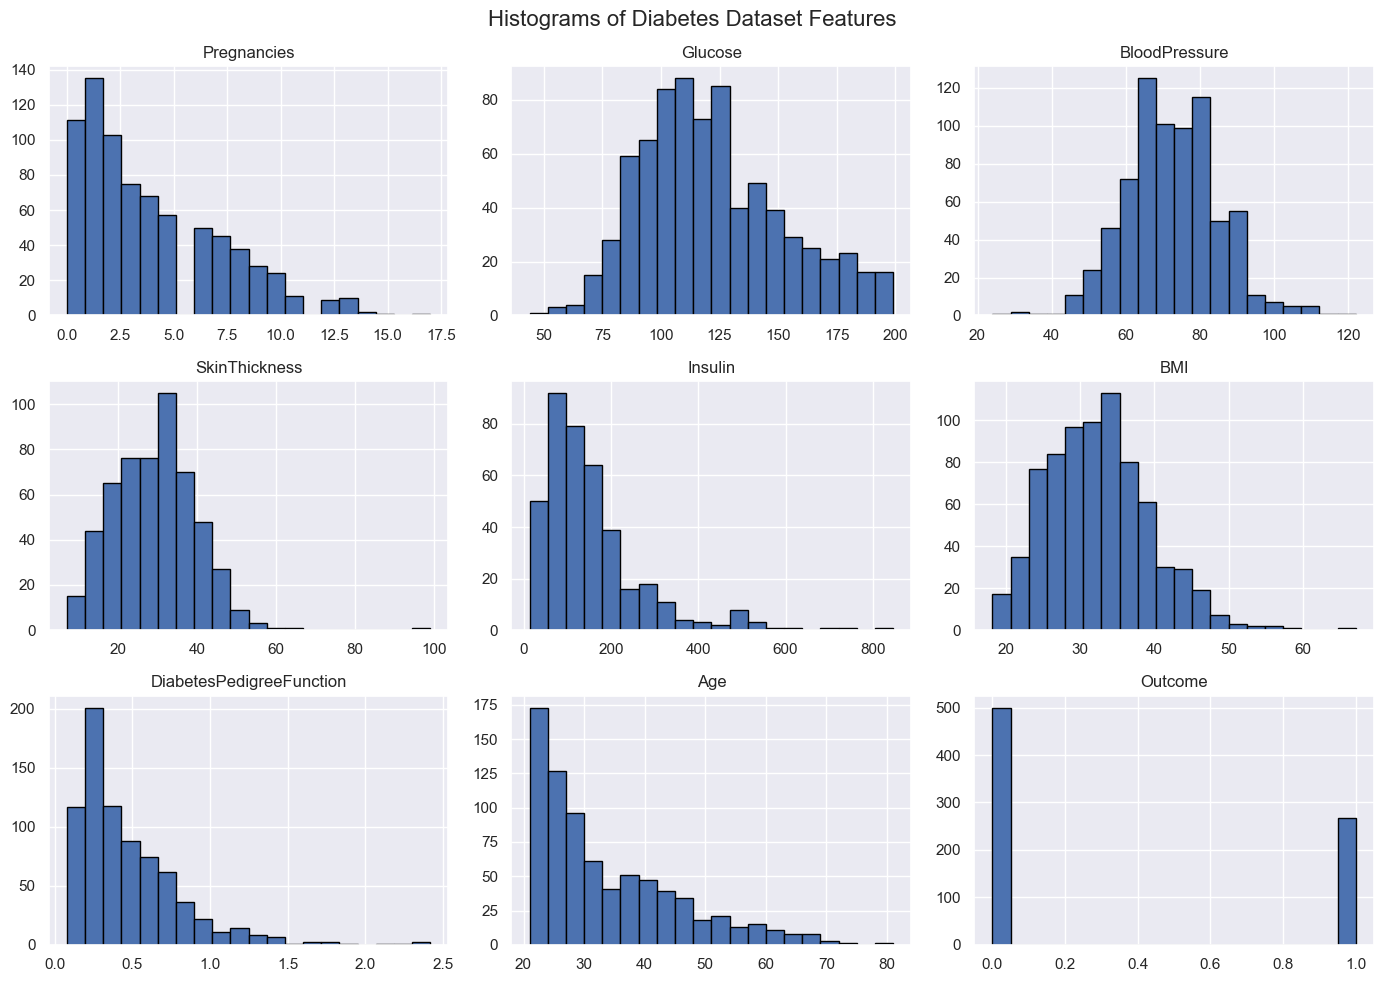

In [6]:
# Plot histograms for each column in the dataset
diabetes_data.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_960/2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/var/folders/fs/qg27m43n3sj3bg7816ln66g40000gn/T/ipykernel_960/2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

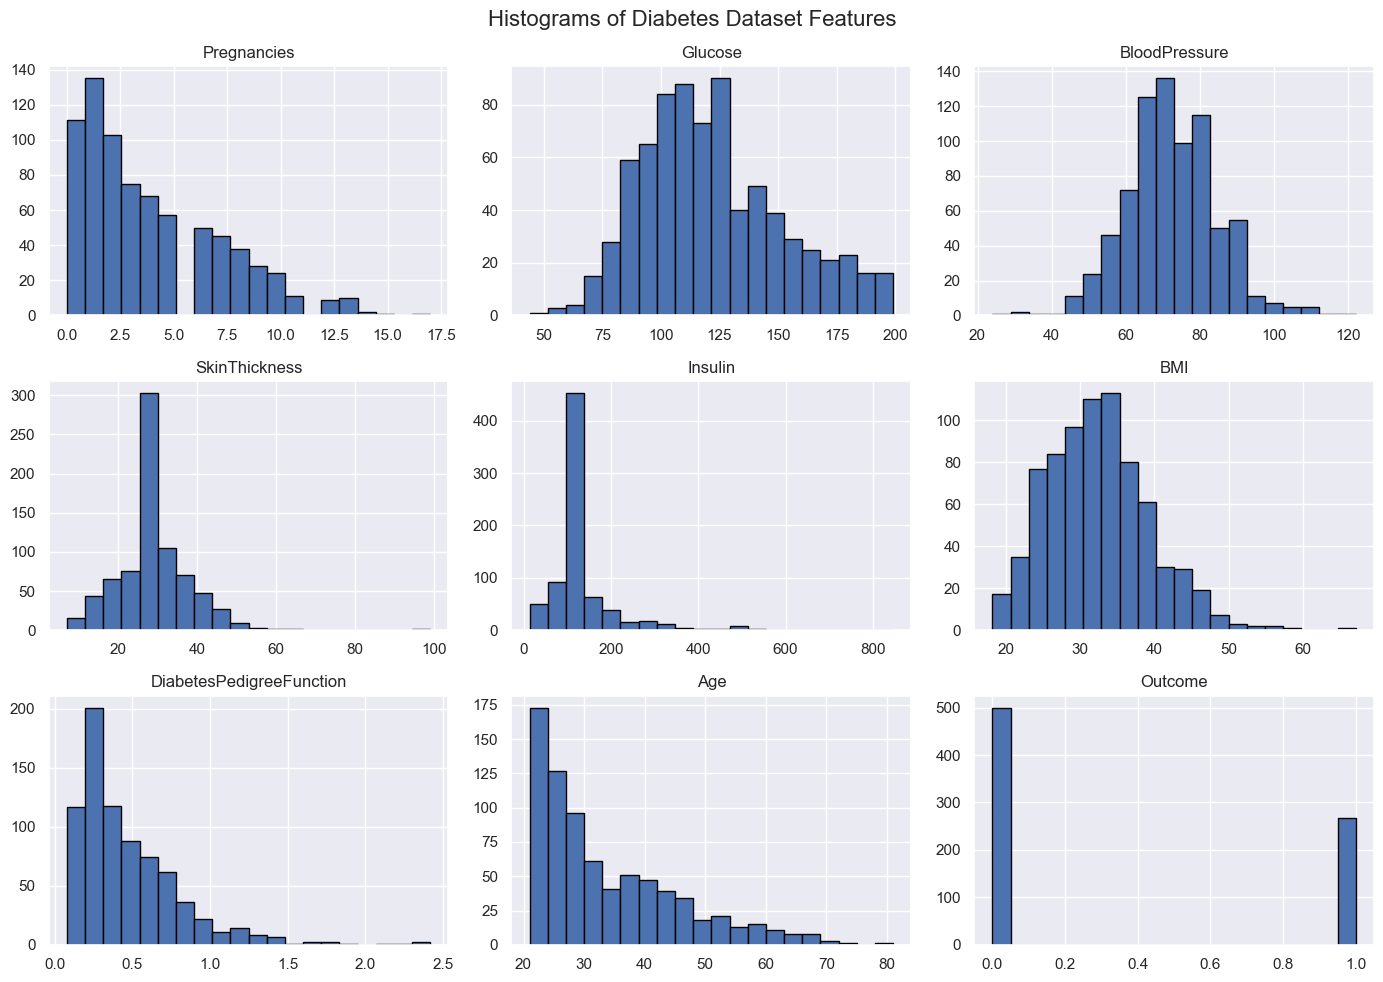

In [8]:
# Plot histograms for each column in the dataset
diabetes_data.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


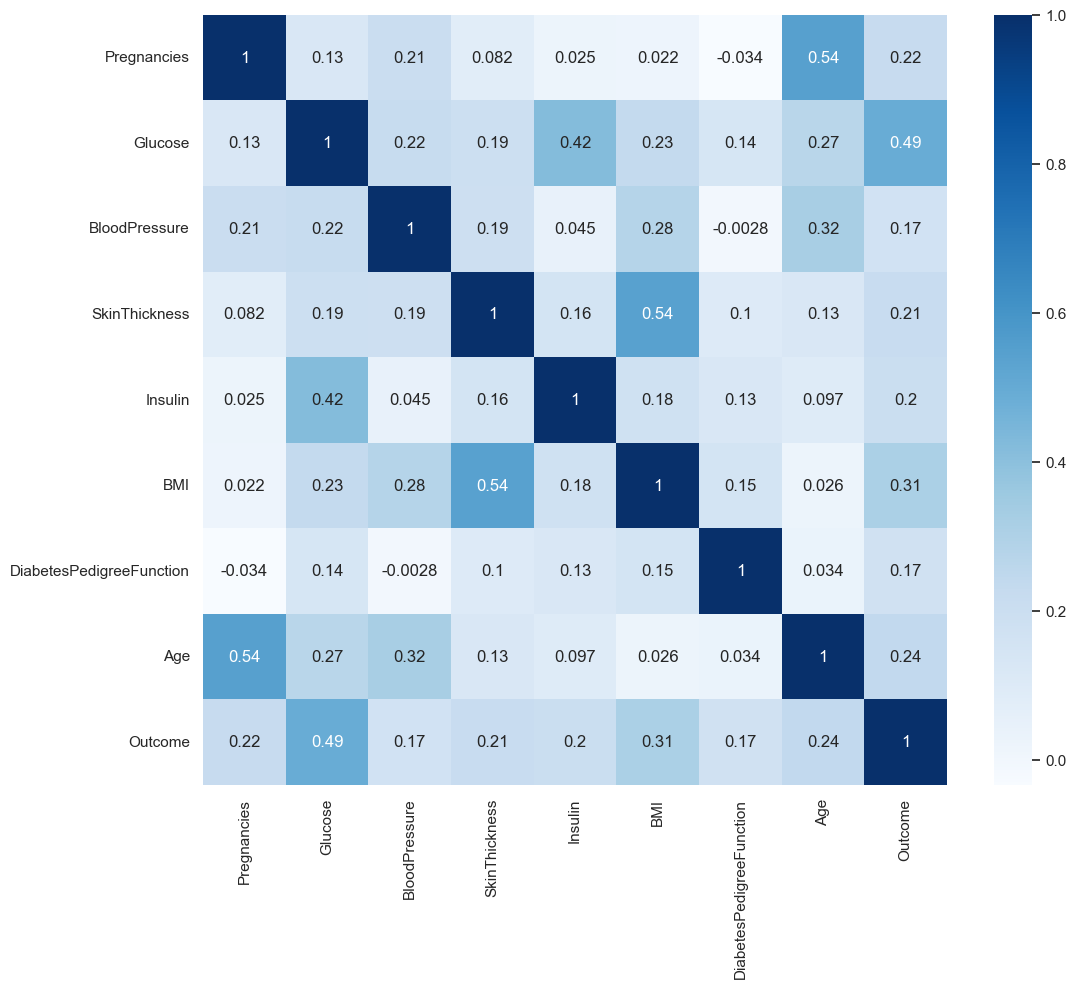

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
# Define the target variable
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [11]:
# Define the feature set (all columns except Outcome)
X = diabetes_data.drop('Outcome', axis=1)

from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42,   # ensures reproducibility
    stratify=y         # Keeps class balance similar in train/test
)

# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only
scaler.fit(X_train)

# Transform both train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [13]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [14]:
# Print full lists after the loop
print("Train Scores for k = 1 to 10:")
print(train_scores)

print("\nTest Scores for k = 1 to 10:")
print(test_scores)


Train Scores for k = 1 to 10:
[1.0, 0.8417132216014898, 0.8621973929236499, 0.8230912476722533, 0.8156424581005587, 0.8026070763500931, 0.7988826815642458, 0.7988826815642458, 0.8063314711359404]

Test Scores for k = 1 to 10:
[0.670995670995671, 0.6926406926406926, 0.7056277056277056, 0.70995670995671, 0.696969696969697, 0.7186147186147186, 0.70995670995671, 0.70995670995671, 0.7142857142857143]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

***K=1 has the highest max score of 1.0***

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

***K=6 has the max score of 0.7186***

Plot the train and test model performance by number of neighbors.

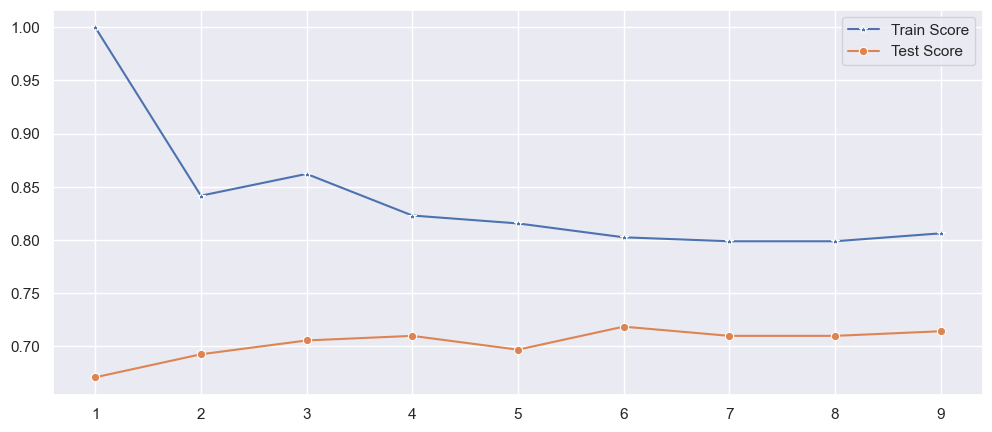

In [15]:
plt.figure(figsize=(12,5))
# Fix: Specify x and y parameters explicitly instead of using positional arguments
p = sns.lineplot(x=range(1,10), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores, marker='o', label='Test Score')

The best choice for this dataset is K = 6, because it delivers the highest performance on the test set, indicating the best generalization.

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Best K value
best_k = 6

# Initialize KNN with optimal k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit model using scaled training data
knn_best.fit(X_train_scaled, y_train)

# Score the model
train_score = knn_best.score(X_train_scaled, y_train)
test_score = knn_best.score(X_test_scaled, y_test)

print(f"Train Accuracy (k={best_k}): {train_score:.4f}")
print(f"Test Accuracy  (k={best_k}): {test_score:.4f}")


Train Accuracy (k=6): 0.8101
Test Accuracy  (k=6): 0.7403


In [17]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

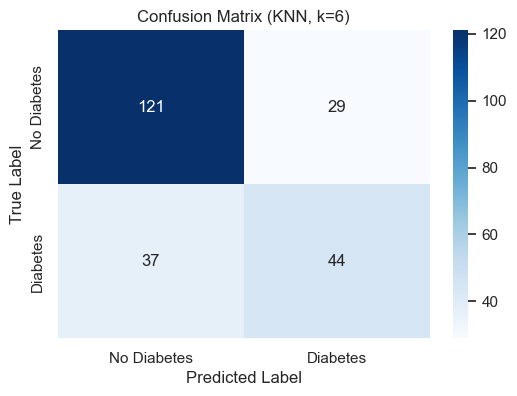

In [18]:
# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(pl, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title("Confusion Matrix (KNN, k=6)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


**<font color='teal'> Print the classification report </font>**

In [19]:
from sklearn.metrics import classification_report

# Predictions using the best model
y_pred = knn_best.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.69      0.47      0.56        81

    accuracy                           0.74       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [21]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300, 500],   # number of trees to test
    'max_depth': [None, 5, 10, 20],             # optional: test tree depth
    'min_samples_split': [2, 5],                # optional: split criteria
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Grid Search with cross-validation
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit on training data (use scaled or unscaled — RF doesn't require scaling)
rf_cv.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", rf_cv.best_params_)
print("Best Cross-Validation Accuracy:", rf_cv.best_score_)

In [ ]:
# Train best model on full training set
rf_best = rf_cv.best_estimator_
rf_best.fit(X_train, y_train)

# Evaluate on test set
test_accuracy = rf_best.score(X_test, y_test)
print("Test Accuracy with Best RF Model:", test_accuracy)